In [64]:
import networkx as nx
import seaborn as sns

# Random models

## Overview

- Erdős-Rényi model
- Albert-Barabási model
- Configuration model

# Erdős-Rényi

1) $G(n, m)$ Fixed $n$ nodes and $m$ edges.
 
   - From the set of networks with n nodes and m edges, take one uniformly at random.
 
2) $G(n, p)$ Fixed $n$ nodes and probability $p$ for each edge.
   - From the set of networks with n nodes and m edges, take one with probability $p^m(1-p)^{{n \choose 2}-m}$.

# Implement in Python $G(n, m)$

For a non-directed graph $G$.

Input:
 A number of nodes $n$ and a number of edges $m$.
 
Output:
 A random simple network $G$ (no parallel edges or self loops) with $n$ nodes and $m$ edges.

```python
def G_nm(n, m):
    return G
    
```

# First code block

1) $m$ too large. Return complete network with $n$ nodes.

2) $n=1$. Return graph with single node.

In [1]:
from itertools import combinations
list(combinations(range(4), 2))

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

Input: n nodes and m edges.
```python
def G_nm(n, m):
    G = nx.Graph()
    nodes = range(n)
    max_edges = n * (n - 1) / 2
    if m >= max_edges:
        edges = list(combinations(nodes, 2))
        G.add_edges_from(edges)
        return G
    if n == 1:
        G.add_node(0)
        return G
```

## Second block

`while` number of edges $< m$: add edges uniformly.

Select node $u$ and $v$ at random from $n$ and add edge $(u, v)$

In [13]:
import random
random.choice(range(4))

3

In [ ]:
```python
    G = nx.Graph()
    nodes = range(n)
    max_edges = n * (n - 1) / 2
    n_edges = 0
    while n_edges < m:
        u = random.choice(nodes)
        v = random.choice(nodes)
        while u == v:
            v = random.choice(nodes)
        e = (u, v)
        if e in G.edges:
            continue
        G.add_edge(u, v)
        n_edges += 1
```

In [39]:
def G_nm(n, m):
    # First block
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    max_edges = n * (n - 1) / 2
    if m >= max_edges:
        edges = list(combinations(nodes, 2))
        G.add_edges_from(edges)
        return G
    # Second Block
    n_edges = 0
    while n_edges < m:
        u = random.choice(nodes)
        v = random.choice(nodes)
        if u != v and (u, v) not in G:
            G.add_edge(u, v)
            n_edges += 1
    
    return G

# G(n, p) model

**Input**: $n$ nodes and probability $p$ for each edge.

**Output**: A random network $G$ with $n$ nodes.

# First Block

If $p=0$ return network with $n$ nodes and zero edges. If $p>=1$ return complete network. 

```python
def G_np(n, p):
    nodes = range(n)
    all_edges
```

# Second Block

Iterate over all possible edges and add each one if a random number is larger than $p$.

In [42]:
import random

random.random()

0.13118798954943067

```python
    for e in all_edges:
```

In [ ]:
def G_np(n, p):
    nodes = range(n)
    all_edges = list(combinations(nodes, 2))
    G = nx.Graph()
    G.add_nodes_from(nodes)
    # First Block
    if p == 0:
        return G
    if p >= 1:
        G.add_edges_from(all_edges)
        return G
    # Second Block
    for e in all_edges:
        r = random.random()
        if r <= p:
            G.add_edge(e[0], e[1])
            
    return G

# Valor esperado del número de aristas

Cuando $X$ es una variable aleatória,
$$E[X] = \sum_{x \in X} xp_x$$

Valor esperado de $m$ cuando la probabilidad es $p$?

$$E[m] = \sum_{e \in E}p = {n \choose 2}p$$

In [62]:
p = 0.05
n = 150
exp = n * (n - 1) / 2 * p
print(exp)

558.75


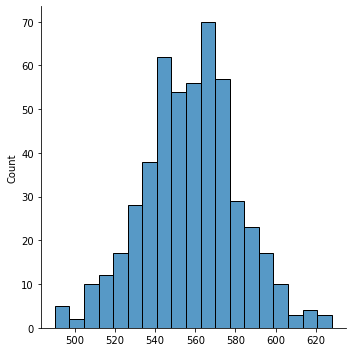

In [65]:
import seaborn as sns

graphs_m = []
for i in range(500):
    G = G_np(n, p)
    graphs_m.append(len(G.edges))
sns.displot(graphs_m)

# Expected Mean degree

Mean degree $\Delta$ of a network with m edges is $2m/n$.

Expected mean degree of a random network with $m$ edges:

$$E[\Delta] = E[2m/n] = 2/n E[m] = 2/n {n \choose 2} p = (n-1)p $$

7.45


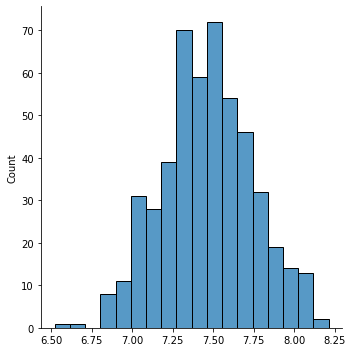

In [67]:
print((n - 1) * p)
mean_degs = []
for i in range(500):
    G = G_np(n, p)
    delta = 2 * len(G.edges) / len(G)
    mean_degs.append(delta)
sns.displot(mean_degs)